<a href="https://colab.research.google.com/github/asillymind22/AI/blob/main/CNN_VNfoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os

In [ ]:
danhsach = ['banhchuoinuong','banhgio','banhmi','banhxeo','cafetrung','chagio','goicuon','nemchua','nemnuong','pho']
!ls /content/gdrive/MyDrive/AIDRIVE/Food/Train
!ls /content/gdrive/MyDrive/AIDRIVE/Food/Train/banhchuoinuong

banhchuoinuong	banhmi	 cafetrung  goicuon  nemnuong
banhgio		banhxeo  chagio     nemchua  pho
10.JPG	12.JPG	14.JPG	1.JPG  3.JPG  5.JPG  7.JPG  9.JPG
11.JPG	13.JPG	15.JPG	2.JPG  4.JPG  6.JPG  8.JPG


In [ ]:
dir_train = '/content/gdrive/MyDrive/AIDRIVE/Food/Train'

In [ ]:
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(32,32)) 
      img = img_to_array(img)
      img = img.reshape(32,32,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)


(149, 32, 32, 3)
(149, 10)


In [ ]:
create_data(dir_train, x_train, y_train)  
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 10)
print(x_train.shape)
print(y_train.shape)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
opt= SGD(lr=0.01,momentum=0.9)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=60,verbose = 1)

Epoch 1/50
3/3 [==============================] - 2s 329ms/step - loss: 2.5745 - accuracy: 0.0604
Epoch 2/50
3/3 [==============================] - 1s 317ms/step - loss: 2.3209 - accuracy: 0.1007
Epoch 3/50
3/3 [==============================] - 1s 316ms/step - loss: 2.2841 - accuracy: 0.1141
Epoch 4/50
3/3 [==============================] - 1s 320ms/step - loss: 2.2691 - accuracy: 0.1812
Epoch 5/50
3/3 [==============================] - 1s 319ms/step - loss: 2.2514 - accuracy: 0.1544
Epoch 6/50
3/3 [==============================] - 1s 317ms/step - loss: 2.2067 - accuracy: 0.2416
Epoch 7/50
3/3 [==============================] - 1s 315ms/step - loss: 2.1689 - accuracy: 0.1745
Epoch 8/50
3/3 [==============================] - 1s 317ms/step - loss: 2.0942 - accuracy: 0.3020
Epoch 9/50
3/3 [==============================] - 1s 315ms/step - loss: 2.0627 - accuracy: 0.2550
Epoch 10/50
3/3 [==============================] - 1s 313ms/step - loss: 2.0296 - accuracy: 0.2886
Epoch 11/50
3/3 [==

In [ ]:
model.save('CNN_food_test')

INFO:tensorflow:Assets written to: CNN_food_test/assets


In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from pathlib import Path
from PIL import Image

8

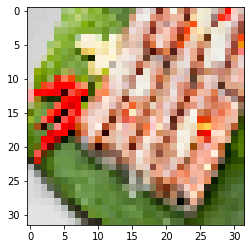

In [ ]:
img = load_img('/content/nemchua.webp',target_size=(32,32))
plt.imshow(img)
img = np.reshape(img,[1,32,32,3])
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))